<a href="https://colab.research.google.com/github/ahmadarbain/skin-disease/blob/main/Skin_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir __skin_diseas__
%cd __skin_diseas__

/content/__skin_diseas__


In [2]:
 ! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadarbain","key":"82aef19e833f600da6e95bdc083345b5"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d shubhamgoel27/dermnet

100% 1.72G/1.72G [00:16<00:00, 128MB/s]
100% 1.72G/1.72G [00:16<00:00, 109MB/s]


In [7]:
! unzip dermnet.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-8.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-80.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keloids-9.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-100.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-101.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-102.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-103.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-104.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-105.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-106.jpg  
  inflating: train/Seborrheic Keratoses and other Benign Tumors/keratoacanthom

#Exploratory Data Analysis

Warts Molluscum and other Viral Infections


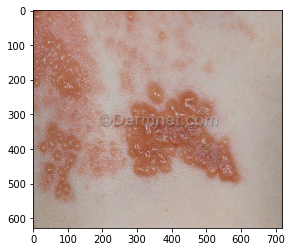

Seborrheic Keratoses and other Benign Tumors


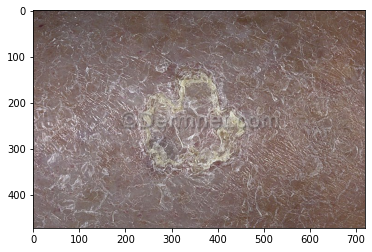

Exanthems and Drug Eruptions


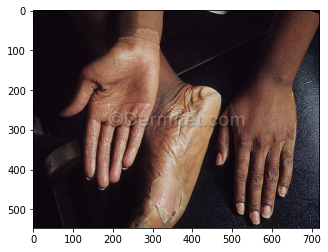

Urticaria Hives


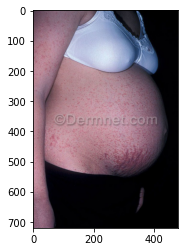

Melanoma Skin Cancer Nevi and Moles


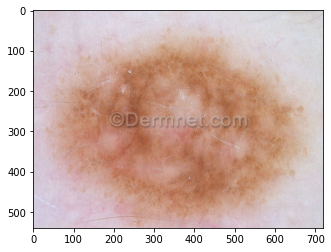

Poison Ivy Photos and other Contact Dermatitis


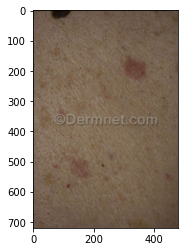

Hair Loss Photos Alopecia and other Hair Diseases


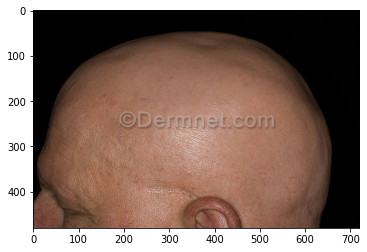

Acne and Rosacea Photos


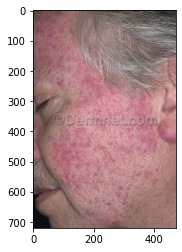

Systemic Disease


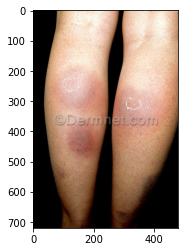

Cellulitis Impetigo and other Bacterial Infections


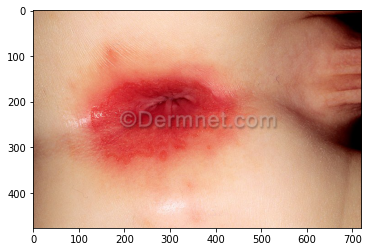

Tinea Ringworm Candidiasis and other Fungal Infections


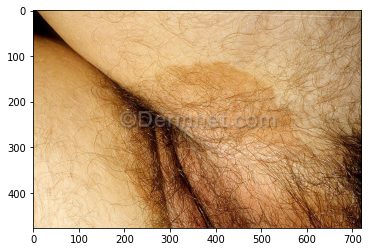

Nail Fungus and other Nail Disease


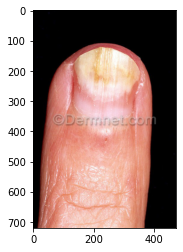

Light Diseases and Disorders of Pigmentation


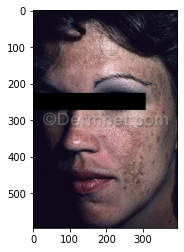

Eczema Photos


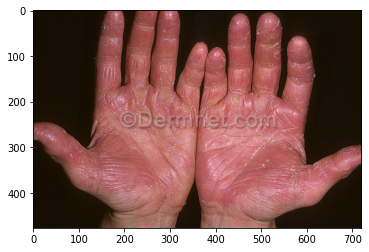

Scabies Lyme Disease and other Infestations and Bites


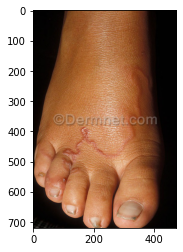

Herpes HPV and other STDs Photos


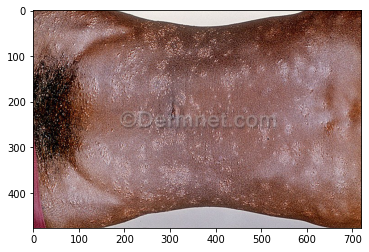

Vasculitis Photos


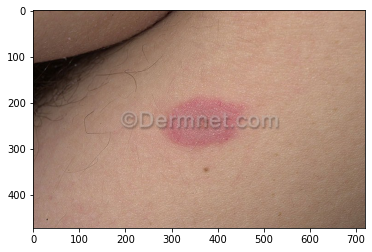

Lupus and other Connective Tissue diseases


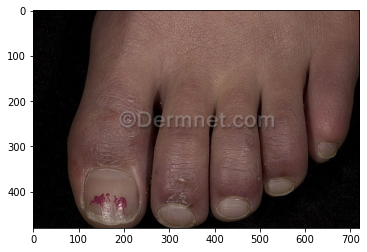

Bullous Disease Photos


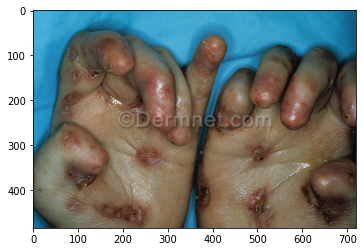

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions


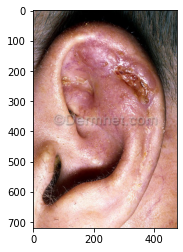

Vascular Tumors


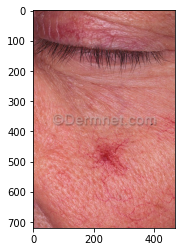

Atopic Dermatitis Photos


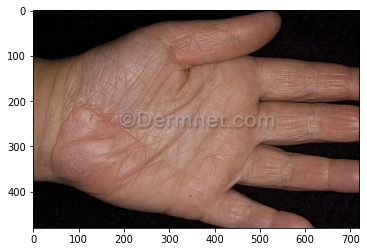

Psoriasis pictures Lichen Planus and related diseases


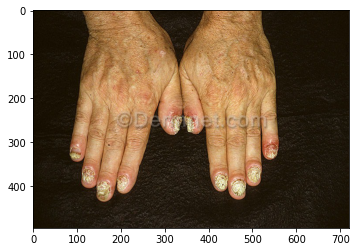

In [8]:
import glob, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pathlib

data_train = pathlib.Path('./train')
data_val = pathlib.Path('./test')

for foldername in os.listdir("./train/"):
  file_path_type = ["./train/"+foldername+"/*.jpg"]
  print(foldername)
  images = glob.glob(random.choice(file_path_type))
  random_image = random.choice(images)
  img = mpimg.imread(random_image)
  imgplot = plt.imshow(img)
  plt.show()

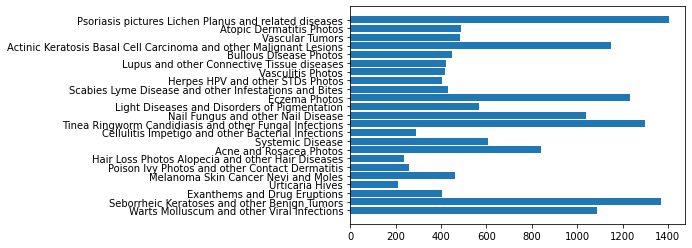

In [9]:
x=[]
y=[]
for foldername in os.listdir("./train/"):
  x.append(foldername)
  count=0
  for filename in os.listdir("./train/"+foldername):
    count+=1
  y.append(count)
plt.barh(x,y)
plt.show()

In [10]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
image_train = len(list(data_train.glob('*/*.jpg')))
image_valid = len(list(data_val.glob('*/*.jpg')))
print(image_train)
print(image_valid)

15557
4002


In [12]:
batch_size = 32
img_height = 200
img_width = 200

In [13]:
train_data = tf.keras.utils.image_dataset_from_directory(
  data_train,
  #validation_split=0.2,
  #subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 15557 files belonging to 23 classes.


In [14]:
validation_data = tf.keras.utils.image_dataset_from_directory(
  data_val,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 4002 files belonging to 23 classes.


In [15]:
class_names = train_data.class_names
print(class_names)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [16]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
normalization_layer = layers.Rescaling(1./255)

In [19]:
import numpy as np

normalized_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9964707


In [20]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1

In [23]:
epochs=10
history = model.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/10
487/487 [==============================] - 47s 77ms/step - loss: 2.8395 - accuracy: 0.1526 - val_loss: 2.7416 - val_accuracy: 0.1857
Epoch 2/10
487/487 [==============================] - 25s 52ms/step - loss: 2.5967 - accuracy: 0.2288 - val_loss: 2.6623 - val_accuracy: 0.2101
Epoch 3/10
487/487 [==============================] - 25s 52ms/step - loss: 2.3552 - accuracy: 0.2952 - val_loss: 2.6566 - val_accuracy: 0.2351
Epoch 4/10
487/487 [==============================] - 25s 52ms/step - loss: 2.0047 - accuracy: 0.4028 - val_loss: 2.7082 - val_accuracy: 0.2706
Epoch 5/10
487/487 [==============================] - 25s 52ms/step - loss: 1.5853 - accuracy: 0.5241 - val_loss: 2.9790 - val_accuracy: 0.2839
Epoch 6/10
487/487 [==============================] - 26s 52ms/step - loss: 1.1467 - accuracy: 0.6621 - val_loss: 3.2977 - val_accuracy: 0.2881
Epoch 7/10
487/487 [==============================] - 25s 52ms/step - loss: 0.7796 - accuracy: 0.7768 - val_loss: 4.0504 - val_accuracy:

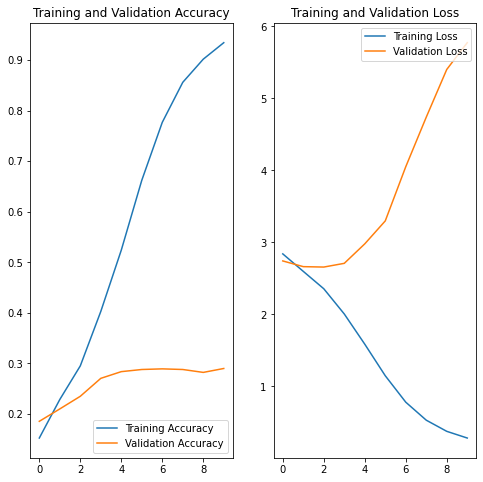

In [24]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

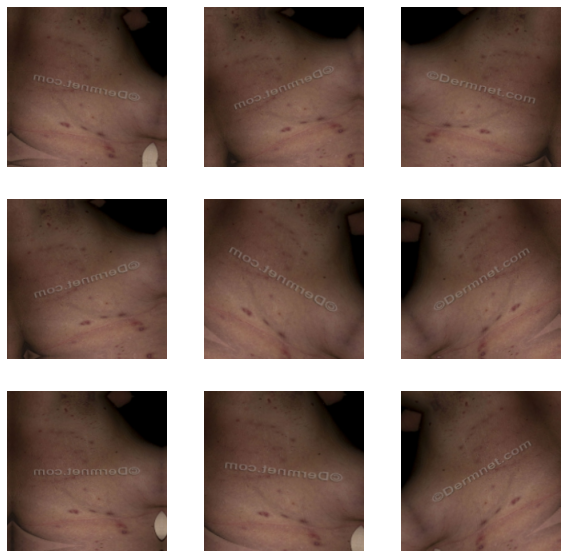

In [28]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [30]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                  

In [34]:
epochs = 100
history = model.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)


Epoch 1/15
487/487 [==============================] - 31s 61ms/step - loss: 2.8743 - accuracy: 0.1457 - val_loss: 2.8648 - val_accuracy: 0.1494
Epoch 2/15
487/487 [==============================] - 29s 60ms/step - loss: 2.7618 - accuracy: 0.1759 - val_loss: 2.7261 - val_accuracy: 0.1974
Epoch 3/15
487/487 [==============================] - 29s 60ms/step - loss: 2.6677 - accuracy: 0.2078 - val_loss: 2.6526 - val_accuracy: 0.2276
Epoch 4/15
487/487 [==============================] - 29s 60ms/step - loss: 2.6029 - accuracy: 0.2300 - val_loss: 2.6058 - val_accuracy: 0.2306
Epoch 5/15
487/487 [==============================] - 29s 60ms/step - loss: 2.5421 - accuracy: 0.2493 - val_loss: 2.6053 - val_accuracy: 0.2391
Epoch 6/15
487/487 [==============================] - 29s 60ms/step - loss: 2.4892 - accuracy: 0.2589 - val_loss: 2.5584 - val_accuracy: 0.2629
Epoch 7/15
487/487 [==============================] - 29s 60ms/step - loss: 2.4372 - accuracy: 0.2745 - val_loss: 2.5482 - val_accuracy:

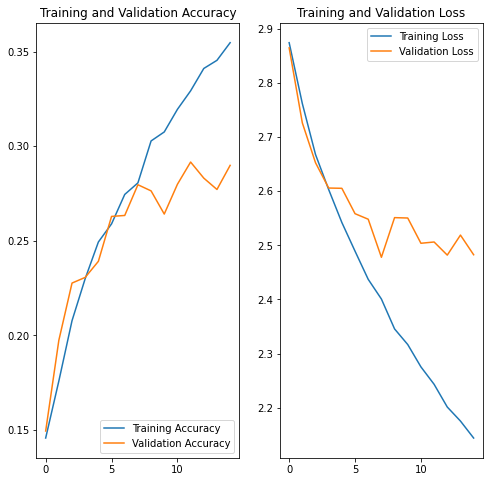

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()